# Generating Points Around a Square

## The Problem

Generate a set of points evenly spaced around the boundary of a square.

$n$ is the number of points per side. The square's coordinates range from $-a$ to $a$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
a = 2

The points on the top edge of the square have $x$-coordinates ranging from $-a$ to $a$ and $y$-coordinates all equal to $a$. Similarly, the points on the left edge have $x$-coordinates all equal to $-a$ and $y$-coordinates ranging from $-a$ to $a$.

## Explicit For Loops

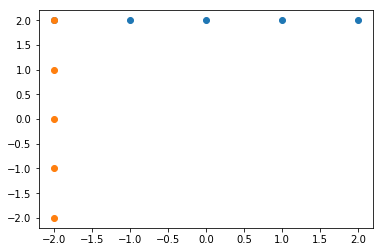

In [2]:
top = []
left = []

# Iterate over every x-coordinate and pair it with constant y-coordinate.
for x in np.linspace(-a, a, n):
    top.append((x, a))
    
# Iterate over every y-coordinate and pair it with constant x-coordinate.
for y in np.linspace(-a, a, n):
    left.append((-a, y))
    
# Turn the lists into NumPy arrays to make it easier to extract the lists
# of x-coordinates and y-coordinates.
top = np.array(top)
left = np.array(left)

# Slice the x-coordinates from each list of points, then the y-coordinates.
plt.plot(top[:,0], top[:,1], 'o')
plt.plot(left[:,0], left[:,1], 'o')
plt.show()

Notice that the upper-left corner is shown in the colour of the left edge because it was plotted last.

I can simplify the code a bit.

In [3]:
top = []
left = []
coordinate_steps = np.linspace(-a, a, n)

for x in coordinate_steps:
    top.append((x, a))
    
for y in coordinate_steps:
    left.append((-a, y))

## NumPy Methods

The list of coordinates for the top edge looks like:

```
[-2, -1, 0, 1, 2]
[ 2,  2, 2, 2, 2]
```

or

```
[-2, 2]
[-1, 2]
[ 0, 2]
[ 1, 2]
[ 2, 2]
```

We can use NumPy's `ones` function to create the array `[2, 2, 2, 2, 2]`, then NumPy's [stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html) function to stick the list `[-2, -1, 0, 1, 2]` and `[2, 2, 2, 2, 2]` together.

In [4]:
coordinate_steps = np.linspace(-a, a, n)
coordinate_const = a * np.ones(n)

print("Changing coordinate:", coordinate_steps)
print("Constant coordinate:", coordinate_const)

top = np.stack((coordinate_steps, coordinate_const))

print("Stacked array:")
print(top)

Changing coordinate: [-2. -1.  0.  1.  2.]
Constant coordinate: [ 2.  2.  2.  2.  2.]
Stacked array:
[[-2. -1.  0.  1.  2.]
 [ 2.  2.  2.  2.  2.]]


However, notice that `top[0]` isn't what you might expect.

In [5]:
top[0]

array([-2., -1.,  0.,  1.,  2.])

If you want the first axis of the array to select the point, rather than the coordinate, just tranpose the array.

The four edges are now easy to make.

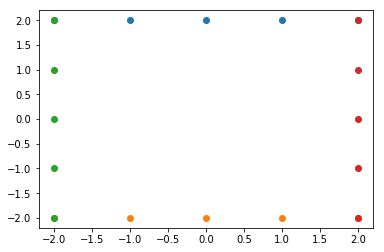

In [6]:
top =    np.stack(( coordinate_steps,  coordinate_const)).T
bottom = np.stack(( coordinate_steps, -coordinate_const)).T
left =   np.stack((-coordinate_const,  coordinate_steps)).T
right =  np.stack(( coordinate_const,  coordinate_steps)).T

plt.plot(top[:,0],    top[:,1],    'o')
plt.plot(bottom[:,0], bottom[:,1], 'o')
plt.plot(left[:,0],   left[:,1],   'o')
plt.plot(right[:,0],  right[:,1],  'o')
plt.show()

## Plotting Simplification

I can clean up my multiple calls to `plt.plot` with a `for` loop.

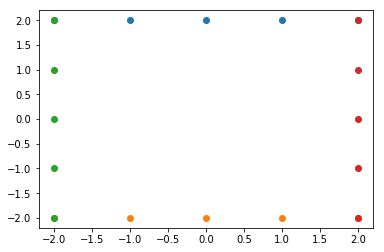

In [7]:
for points in (top, bottom, left, right):
    plt.plot(points[:,0], points[:,1], 'o')
    
plt.show()